### Statistical Inference Confidence Interval

This notebook demostrates the concept of confidence interval (CI) of an estimate. We will examine the coverage probability of CI.


Consider a senario: FSU has **20,000** students, their IQ level follows a normal distribution with mean of **110**, and standard deviation of **10**. Let's draw samples from the student population and examine the relationship between sample and population.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate population data

(array([1.000e+00, 3.500e+01, 3.560e+02, 1.774e+03, 4.630e+03, 6.511e+03,
        4.632e+03, 1.714e+03, 3.220e+02, 2.500e+01]),
 array([ 64.33023074,  72.6639964 ,  80.99776206,  89.33152772,
         97.66529338, 105.99905904, 114.3328247 , 122.66659036,
        131.00035602, 139.33412168, 147.66788734]),
 <BarContainer object of 10 artists>)

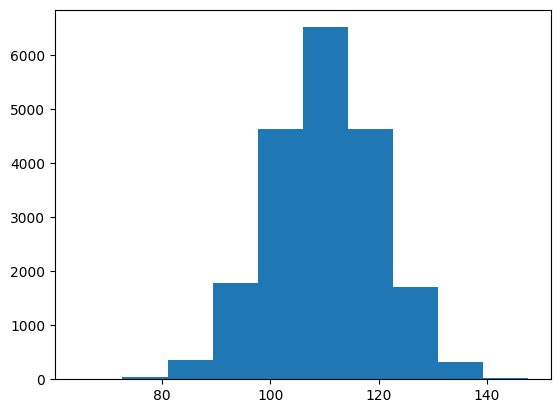

In [2]:
N = 20000 #20,000 students

#Generate from a normal distribution
data = np.random.randn(N)*10 + 110

plt.hist(data)

In [3]:
print("Population mean is:", np.mean(data))
print("Population variance is:", np.var(data))

Population mean is: 110.04096566502429
Population variance is: 99.0459791426906



### Now lets draw samples. Let's start with a sample size of 10 students

In [7]:
#One sample with 10 numbers

sample_10 = np.random.choice(data, 10)

sample_10

array([113.59477701, 114.51713312,  99.53640592, 102.48217052,
       108.5732709 ,  88.84786517, 128.20907141,  95.58607001,
       108.98198733, 125.48478634])

In [8]:
print("The sample mean is: ", np.mean(sample_10))

The sample mean is:  108.58135377326889


### How about if we repeat the sampling process, say 1,000 times

Get the critical t value from the t-distribution. Degree of freedom: 10-1 (sample size - 1). Confidence interval width: 95%.

In [12]:
from scipy import stats

t = stats.t.ppf(1-0.05/2, 9)
print(t)

2.262157162740991


In [13]:
coverage_list = []

for i in range(1000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    err_of_margin = t*np.std(sample)/np.sqrt(10)
    
    CI_lower = sample_mean - err_of_margin
    CI_upper = sample_mean + err_of_margin
    
    true_mean = np.mean(data)
    
    is_covered = (true_mean>=CI_lower) and (true_mean<=CI_upper)
    
    print(i," 95% confidence interval ", [CI_lower, CI_upper], "Cover the true mean?", is_covered)
    
    coverage_list.append(is_covered)

0  95% confidence interval  [108.20579548524148, 119.76855519257015] Cover the true mean? True
1  95% confidence interval  [106.44613766023613, 121.47152262576734] Cover the true mean? True
2  95% confidence interval  [109.10694247773503, 121.16102047300714] Cover the true mean? True
3  95% confidence interval  [98.22409473889817, 109.32345627729518] Cover the true mean? False
4  95% confidence interval  [96.83627441707375, 113.87420179486298] Cover the true mean? True
5  95% confidence interval  [106.8380821613878, 121.77620159232711] Cover the true mean? True
6  95% confidence interval  [106.29813616139575, 114.43586463015328] Cover the true mean? True
7  95% confidence interval  [106.488151300693, 110.72203951802891] Cover the true mean? True
8  95% confidence interval  [99.38899958574288, 115.24254684784736] Cover the true mean? True
9  95% confidence interval  [105.71041735433698, 119.29373690578967] Cover the true mean? True
10  95% confidence interval  [105.24235564534084, 115.7

We observe that sometimes that the CI covers the mean, and sometimes not. So what is the true coverage probability?

In [17]:
np.sum(coverage_list)

946

In [16]:
np.sum(coverage_list)/len(coverage_list)*100

94.6

It is 93.4% from the above example, fairly close to 95%. 

Similarly to when we examine the sample mean bias, the coverage % will be closer to 95% accurate if we do more samplings (10,000 -> 1,000,000)

In [18]:
coverage_list = []

for i in range(100000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    err_of_margin = t*np.std(sample)/np.sqrt(10)
    
    CI_lower = sample_mean - err_of_margin
    CI_upper = sample_mean + err_of_margin
    
    true_mean = np.mean(data)
    
    is_covered = (true_mean>=CI_lower) and (true_mean<=CI_upper)
    
    print(i," 95% confidence interval ", sample_mean, "Cover the true mean?", is_covered)
    
    coverage_list.append(is_covered)

0  95% confidence interval  110.20730620443385 Cover the true mean? True
1  95% confidence interval  114.93924490915984 Cover the true mean? True
2  95% confidence interval  110.0726408794591 Cover the true mean? True
3  95% confidence interval  111.40191576735019 Cover the true mean? True
4  95% confidence interval  109.36814283454942 Cover the true mean? True
5  95% confidence interval  103.9120509127005 Cover the true mean? False
6  95% confidence interval  108.64835469517922 Cover the true mean? True
7  95% confidence interval  104.02800490703616 Cover the true mean? False
8  95% confidence interval  113.35318875351516 Cover the true mean? True
9  95% confidence interval  110.02804547374812 Cover the true mean? True
10  95% confidence interval  103.21687226493714 Cover the true mean? True
11  95% confidence interval  106.5719594248598 Cover the true mean? True
12  95% confidence interval  109.62987781041139 Cover the true mean? True
13  95% confidence interval  105.96542019695964 C

5565  95% confidence interval  108.30437954844535 Cover the true mean? True
5566  95% confidence interval  101.6121859297645 Cover the true mean? False
5567  95% confidence interval  108.28905513950443 Cover the true mean? True
5568  95% confidence interval  113.50533512256285 Cover the true mean? True
5569  95% confidence interval  107.86581343875613 Cover the true mean? True
5570  95% confidence interval  110.40079900782068 Cover the true mean? True
5571  95% confidence interval  115.2359684409364 Cover the true mean? True
5572  95% confidence interval  111.05856096973837 Cover the true mean? True
5573  95% confidence interval  115.03299744182198 Cover the true mean? True
5574  95% confidence interval  108.90044764970919 Cover the true mean? True
5575  95% confidence interval  108.67829554059047 Cover the true mean? True
5576  95% confidence interval  109.53374495820415 Cover the true mean? True
5577  95% confidence interval  110.04576773716992 Cover the true mean? True
5578  95% con

11268  95% confidence interval  106.77165246510658 Cover the true mean? True
11269  95% confidence interval  114.64375030077846 Cover the true mean? True
11270  95% confidence interval  111.37784901004443 Cover the true mean? True
11271  95% confidence interval  109.94275375359389 Cover the true mean? True
11272  95% confidence interval  111.88444419701253 Cover the true mean? True
11273  95% confidence interval  103.79496817450745 Cover the true mean? False
11274  95% confidence interval  112.26184986580245 Cover the true mean? True
11275  95% confidence interval  109.56145932669283 Cover the true mean? True
11276  95% confidence interval  110.51377018143812 Cover the true mean? True
11277  95% confidence interval  108.39568016654842 Cover the true mean? True
11278  95% confidence interval  110.29925250483412 Cover the true mean? True
11279  95% confidence interval  114.69485649469686 Cover the true mean? True
11280  95% confidence interval  110.60663123814052 Cover the true mean? Tru

17160  95% confidence interval  111.41136717042555 Cover the true mean? True
17161  95% confidence interval  111.02688420747772 Cover the true mean? True
17162  95% confidence interval  109.12348661328272 Cover the true mean? True
17163  95% confidence interval  111.61815025384897 Cover the true mean? True
17164  95% confidence interval  109.31913310367433 Cover the true mean? True
17165  95% confidence interval  107.782764246629 Cover the true mean? True
17166  95% confidence interval  110.43775022208024 Cover the true mean? True
17167  95% confidence interval  108.54628650905218 Cover the true mean? True
17168  95% confidence interval  111.57950961978804 Cover the true mean? True
17169  95% confidence interval  104.89510815846381 Cover the true mean? True
17170  95% confidence interval  110.52540326274713 Cover the true mean? True
17171  95% confidence interval  115.18863464207962 Cover the true mean? True
17172  95% confidence interval  111.61785776044003 Cover the true mean? True
1

21584  95% confidence interval  108.70319965040503 Cover the true mean? True
21585  95% confidence interval  110.52151562263097 Cover the true mean? True
21586  95% confidence interval  107.59879143524135 Cover the true mean? True
21587  95% confidence interval  113.3451570904919 Cover the true mean? True
21588  95% confidence interval  111.33841962749997 Cover the true mean? True
21589  95% confidence interval  108.83340250557471 Cover the true mean? True
21590  95% confidence interval  112.98394780309505 Cover the true mean? True
21591  95% confidence interval  112.88296457233903 Cover the true mean? True
21592  95% confidence interval  108.16933444376266 Cover the true mean? True
21593  95% confidence interval  106.62991205751958 Cover the true mean? True
21594  95% confidence interval  112.19029106329101 Cover the true mean? True
21595  95% confidence interval  107.01750488652075 Cover the true mean? True
21596  95% confidence interval  115.64154786803002 Cover the true mean? True


26294  95% confidence interval  108.32136508484489 Cover the true mean? True
26295  95% confidence interval  106.74076535331133 Cover the true mean? True
26296  95% confidence interval  107.96127804143819 Cover the true mean? True
26297  95% confidence interval  109.25499319921244 Cover the true mean? True
26298  95% confidence interval  110.03841882970912 Cover the true mean? True
26299  95% confidence interval  107.78372510542678 Cover the true mean? True
26300  95% confidence interval  114.45859974234406 Cover the true mean? True
26301  95% confidence interval  111.9085426914633 Cover the true mean? True
26302  95% confidence interval  105.72603978954616 Cover the true mean? True
26303  95% confidence interval  113.41482729860624 Cover the true mean? True
26304  95% confidence interval  106.72851324608943 Cover the true mean? True
26305  95% confidence interval  111.67364317306665 Cover the true mean? True
26306  95% confidence interval  106.59757524549192 Cover the true mean? True


30905  95% confidence interval  104.34201394689883 Cover the true mean? True
30906  95% confidence interval  108.43080926487293 Cover the true mean? True
30907  95% confidence interval  106.93049642114104 Cover the true mean? True
30908  95% confidence interval  109.47520038279431 Cover the true mean? True
30909  95% confidence interval  107.20430267260151 Cover the true mean? True
30910  95% confidence interval  112.41119394671641 Cover the true mean? True
30911  95% confidence interval  114.98502429617986 Cover the true mean? True
30912  95% confidence interval  112.206267474778 Cover the true mean? True
30913  95% confidence interval  109.81573662727104 Cover the true mean? True
30914  95% confidence interval  110.61583779910772 Cover the true mean? True
30915  95% confidence interval  111.69097019605985 Cover the true mean? True
30916  95% confidence interval  109.32947619522542 Cover the true mean? True
30917  95% confidence interval  112.53536760493073 Cover the true mean? True
3

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



84133  95% confidence interval  112.79268870966766 Cover the true mean? True
84134  95% confidence interval  108.03898711851078 Cover the true mean? True
84135  95% confidence interval  104.12479074652273 Cover the true mean? True
84136  95% confidence interval  104.95014645411602 Cover the true mean? True
84137  95% confidence interval  106.19969067606311 Cover the true mean? True
84138  95% confidence interval  106.90160095706793 Cover the true mean? True
84139  95% confidence interval  107.58419508949882 Cover the true mean? True
84140  95% confidence interval  113.12958640065366 Cover the true mean? True
84141  95% confidence interval  104.38428696750854 Cover the true mean? False
84142  95% confidence interval  112.76116416483251 Cover the true mean? True
84143  95% confidence interval  110.03958352600459 Cover the true mean? True
84144  95% confidence interval  107.67669422687558 Cover the true mean? True
84145  95% confidence interval  109.14627326362029 Cover the true mean? Tru

89032  95% confidence interval  104.00979009586558 Cover the true mean? False
89033  95% confidence interval  106.7211468747873 Cover the true mean? True
89034  95% confidence interval  114.2797009994845 Cover the true mean? True
89035  95% confidence interval  109.11707061796074 Cover the true mean? True
89036  95% confidence interval  110.40900629818509 Cover the true mean? True
89037  95% confidence interval  112.2897077317258 Cover the true mean? True
89038  95% confidence interval  114.32720630107205 Cover the true mean? True
89039  95% confidence interval  104.86560590050362 Cover the true mean? True
89040  95% confidence interval  110.03720346092373 Cover the true mean? True
89041  95% confidence interval  108.61824202828954 Cover the true mean? True
89042  95% confidence interval  113.55661883066031 Cover the true mean? True
89043  95% confidence interval  113.32553922188576 Cover the true mean? True
89044  95% confidence interval  108.59781684691237 Cover the true mean? True
8

94643  95% confidence interval  111.80142042998246 Cover the true mean? True
94644  95% confidence interval  109.45205765011698 Cover the true mean? True
94645  95% confidence interval  109.40029875705329 Cover the true mean? True
94646  95% confidence interval  108.00227673710931 Cover the true mean? True
94647  95% confidence interval  112.8842048403601 Cover the true mean? True
94648  95% confidence interval  108.84756385028564 Cover the true mean? True
94649  95% confidence interval  114.92361736444506 Cover the true mean? True
94650  95% confidence interval  107.43424182806402 Cover the true mean? True
94651  95% confidence interval  111.38850069470814 Cover the true mean? True
94652  95% confidence interval  107.87085156843423 Cover the true mean? True
94653  95% confidence interval  108.14433138515055 Cover the true mean? True
94654  95% confidence interval  105.79769891902247 Cover the true mean? True
94655  95% confidence interval  110.18710289632027 Cover the true mean? True


In [19]:
np.sum(coverage_list)/len(coverage_list)*100

93.918